In [1]:
from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
import string
import numpy as np
#!pip install tensorflow
#import tensorflow as tf
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
# !pip install keras
# from keras.models import Sequential,load_model
# from keras.layers import Dense, advanced_activations, Dropout, LSTM, GRU, Embedding, SimpleRNN, Conv2D, Flatten
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import ImageDataGenerator
!pip install tqdm
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import glob
#import cv2
import gc
!pip install mne
import mne
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time
import pickle

def save_model_json(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(f"{filename}.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f"{filename}.h5")
    print(f"Saved {filename} to disk")



def load_model_json(filename):
    # load json and create model
    json_file = open(f'{filename}.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(f"{filename}.h5")
    print(f"Loaded {filename} from disk")
    return loaded_model

In [2]:
dir_path = "C:/Users/willa/Documents/Diss/Recording files/Participants/Will Adkins/"

with ZipFile(dir_path + 'Labelled.zip', 'r') as zip_file:
    print(zip_file)
    print(zip_file.printdir())
    zip_file.extractall()

speaking1 = pd.read_csv('Labelled/speaking1_labelled.csv')
speaking2 = pd.read_csv('Labelled/speaking2_labelled.csv')
speaking3 = pd.read_csv('Labelled/speaking3_labelled.csv')
speaking4 = pd.read_csv('Labelled/speaking4_labelled.csv')
speaking5 = pd.read_csv('Labelled/speaking5_labelled.csv')
speaking6 = pd.read_csv('Labelled/speaking6_labelled.csv')
speaking7 = pd.read_csv('Labelled/speaking7_labelled.csv')
speaking8 = pd.read_csv('Labelled/speaking8_labelled.csv')
speaking9 = pd.read_csv('Labelled/speaking9_labelled.csv')
speaking10 = pd.read_csv('Labelled/speaking10_labelled.csv')
stimuli = pd.read_csv('Labelled/stimuli_labelled.csv')

<zipfile.ZipFile filename='C:/Users/willa/Documents/Diss/Recording files/Participants/Will Adkins/Labelled.zip' mode='r'>
File Name                                             Modified             Size
Labelled/break_labelled.csv                    2022-07-19 22:44:30     23766696
Labelled/buffer_labelled.csv                   2022-07-19 22:44:30      4693780
Labelled/get_ready_labelled.csv                2022-07-19 22:44:30      2192358
Labelled/relax_labelled.csv                    2022-07-19 22:44:32     23390403
Labelled/speaking1_labelled.csv                2022-07-19 22:44:32      9488182
Labelled/speaking10_labelled.csv               2022-07-19 22:44:34      9522309
Labelled/speaking2_labelled.csv                2022-07-19 22:44:34      9488732
Labelled/speaking3_labelled.csv                2022-07-19 22:44:34      9487638
Labelled/speaking4_labelled.csv                2022-07-19 22:44:36      9488916
Labelled/speaking5_labelled.csv                2022-07-19 22:44:36      948957

In [3]:
speaking1

,Time:128Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Reference,Reference.1,Label,Mode of Stimulus,Stage
0,23.000000,0,4148.461426,1787.692261,5012.820312,7650.897461,7175.256348,6158.974121,1870.128174,4821.153809,...,7286.025879,1748.461548,6940.000000,4641.538574,4790.000000,7411.282227,5585.769043,Lamp,audio,speaking1
1,23.007812,0,7715.128418,4448.461426,6630.897461,942.179504,6732.051270,7986.922852,1451.153809,330.769226,...,7344.743652,4647.436035,6044.743652,6034.743652,2178.589844,2190.641113,5097.820312,Lamp,audio,speaking1
2,23.015625,0,5495.512695,4839.358887,3512.820557,2630.897461,7103.974121,3377.051270,1573.974365,666.538452,...,505.000000,218.076920,756.538452,6781.538574,8176.025879,7369.871582,1549.102539,Lamp,audio,speaking1
3,23.023438,0,5090.256348,2771.281982,7923.846191,1864.743530,7323.846191,6768.589844,2446.666748,4467.820312,...,6591.922852,6465.000000,1013.076904,7691.922852,5233.205078,746.538452,3896.025635,Lamp,audio,speaking1
4,23.031250,0,2058.461426,6185.641113,7002.307617,4439.230957,5298.846191,6810.128418,7844.871582,4514.358887,...,8046.410156,7586.922852,3184.871826,7878.589844,7260.641113,2918.718018,3041.538574,Lamp,audio,speaking1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,4485.960938,129,1468.589722,5050.128418,7318.589844,8232.564453,5042.051270,8067.948730,8158.077148,5197.948730,...,4833.461426,7210.512695,8026.666504,6424.871582,1133.974365,7322.436035,4174.871582,Clock,text,speaking1
33276,4485.968750,129,6091.282227,5493.717773,8208.974609,7363.077148,2462.307617,1258.205078,1106.923096,905.769226,...,5721.153809,1677.564087,1514.743530,4772.692383,8063.974609,5472.051270,7736.922852,Clock,text,speaking1
33277,4485.976562,129,1981.666626,7613.077148,8358.333008,753.589722,5125.897461,8044.230957,7666.153809,1568.076904,...,1206.923096,4487.820312,7678.846191,6269.615234,2257.820557,3048.333252,6348.205078,Clock,text,speaking1
33278,4485.984375,129,7719.102539,4918.077148,1764.871826,292.948700,4841.666504,5600.641113,4044.743652,3638.333252,...,4264.358887,5447.563965,7207.948730,6441.282227,2360.512695,6056.410156,5508.717773,Clock,text,speaking1


In [4]:
stimuli

,Time:128Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Reference,Reference.1,Label,Mode of Stimulus,Stage
0,20.000000,0,6932.436035,8096.794922,4146.410156,2550.641113,3621.538574,1228.974365,3419.871826,5799.743652,...,2382.692383,6984.230957,2504.487061,5297.563965,7662.436035,2543.333252,940.384583,Lamp,audio,stimuli
1,20.007812,0,6715.641113,7600.769043,1234.615356,722.435913,5969.615234,5796.282227,7848.077148,6649.743652,...,1838.076904,7683.461426,6355.512695,8290.000000,5185.769043,5943.205078,681.025635,Lamp,audio,stimuli
2,20.015625,0,5448.846191,3505.641113,4227.563965,2491.923096,4615.000000,262.820496,7373.077148,1199.359009,...,2129.487061,4467.307617,5118.717773,602.435913,1653.974365,5593.589844,8382.307617,Lamp,audio,stimuli
3,20.023438,0,1480.384644,4577.563965,4324.102539,2265.897461,8336.025391,6121.538574,5785.000000,4247.563965,...,607.820496,2594.487061,4540.897461,4370.000000,2056.538574,5663.846191,7012.179688,Lamp,audio,stimuli
4,20.031250,0,2991.281982,4941.794922,6479.743652,2383.974365,1644.230713,6537.436035,4683.974121,8041.794922,...,4267.948730,3602.564209,3123.589844,462.051270,1499.871826,562.948730,7241.025879,Lamp,audio,stimuli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,4482.960938,129,6581.922852,6659.358887,3007.307617,4084.871826,2219.871826,5911.282227,4166.666504,5605.897461,...,8191.153809,7676.025879,4599.102539,1239.871826,3801.923096,1189.743530,1155.640991,Clock,text,stimuli
33276,4482.968750,129,2421.666748,6437.179688,4525.128418,6805.512695,421.282043,4466.666504,2554.615479,6562.436035,...,2271.923096,5885.769043,3495.512939,3018.589844,8328.974609,6279.102539,1344.102539,Clock,text,stimuli
33277,4482.976562,129,5712.307617,4172.307617,7901.410156,2333.589844,2333.205078,3178.718018,6028.205078,6933.333496,...,2052.820557,3807.435791,8277.692383,5705.128418,6986.153809,2425.384521,5032.307617,Clock,text,stimuli
33278,4482.984375,129,3771.794922,664.102539,4958.717773,7562.179688,784.102539,6047.179688,8190.512695,8028.333496,...,4864.743652,2004.359009,4039.615479,3894.743652,4952.948730,6607.563965,3267.051270,Clock,text,stimuli


In [5]:
print(speaking1['Label'].unique())
print(speaking1['Mode of Stimulus'].unique())

['Lamp' 'Ambulance' 'Clock' 'Rest' 'Hospital']
['audio' 'image' 'text' 'None']


In [6]:
speaking1.drop(columns = ['Time:128Hz', 'Epoch', 'Stage', 'Reference', 'Reference.1', 'Label', 'Mode of Stimulus']).to_numpy().reshape(130, 256 * 14).shape

(130, 3584)

In [7]:
speaking1.shape

(33280, 21)

In [8]:
speaking = pd.concat([speaking1, speaking2, speaking3, speaking4, speaking5, speaking6, speaking7, speaking8, speaking9, speaking10], axis = 0)

In [9]:
def Handle(dataframe):
    
    features = dataframe.drop(columns = ['Time:128Hz', 'Epoch', 'Stage', 'Reference', 'Reference.1', 'Label', 'Mode of Stimulus']).to_numpy().reshape(dataframe.shape[0] // (256), 256 * 14)
    targets = dataframe['Label'].to_numpy().reshape(dataframe.shape[0] // (256), 256)[:, 0]
    modes_of_stimuli = dataframe['Mode of Stimulus'].to_numpy().reshape(dataframe.shape[0] // (256), 256)[:, 0]
    return features, targets, modes_of_stimuli
features, targets, modes_of_stimuli = Handle(speaking)
stimuli_features, stimuli_targets, modes_of_stimuli_stimstage = Handle(stimuli)
pd.DataFrame(features)

,0,1,2,3,4,5,6,7,8,9,...,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583
0,4148.461426,1787.692261,5012.820312,7650.897461,7175.256348,6158.974121,1870.128174,4821.153809,4444.871582,7286.025879,...,4680.128418,5995.641113,4594.743652,5797.307617,4402.179688,6143.589844,6444.358887,1939.487183,4144.487305,6404.487305
1,2771.410156,3367.948730,1457.948730,2753.333252,7679.102539,1946.410278,5484.743652,4221.025879,6988.974121,6494.102539,...,7992.820312,4792.179688,5521.538574,6476.153809,2912.435791,6614.102539,126.282043,6511.922852,4171.282227,2390.384521
2,2306.281982,1453.205078,8071.922852,5405.384766,8265.127930,6469.358887,4877.563965,398.333313,5582.179688,3882.307617,...,647.435913,6748.589844,7433.974609,421.282043,5012.820312,4925.512695,7152.692383,6614.487305,7695.641113,4902.563965
3,4955.256348,6849.358887,254.999985,6353.077148,1539.230713,4887.948730,1236.025635,6815.897461,7885.641113,3931.538574,...,789.358948,3245.641113,4064.230713,6334.230957,5238.846191,3993.076904,2436.794922,685.384583,53.076916,4977.820312
4,7402.179688,510.641022,3247.307617,2330.769287,3380.128174,1548.974365,5924.358887,7318.205078,5918.717773,3487.179443,...,2806.153809,3532.051270,83.076912,5402.436035,1187.179443,2229.230713,5234.230957,3041.794922,5730.512695,2047.179443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,5511.666504,5219.487305,5348.461426,2331.153809,461.410248,7333.333496,7269.230957,1933.974365,830.128174,632.051270,...,7339.743652,5044.487305,7102.820312,8189.871582,1836.153809,1240.512817,3467.051270,1050.769165,7134.230957,738.461548
1296,3776.025635,5357.563965,7711.153809,2508.333252,2369.487061,928.974365,937.307678,3268.718018,7037.948730,2985.769287,...,3183.718018,5616.922852,5799.230957,1995.769165,6606.410156,5456.025879,1921.025635,7433.717773,2769.487061,179.102554
1297,2916.025635,7943.974609,9.230761,7710.128418,3245.512939,3800.641113,3612.820557,6474.487305,4987.436035,1063.974365,...,2059.102539,1663.717896,5314.358887,6323.077148,2350.512695,6257.820312,6596.538574,4102.436035,1311.025635,5576.282227
1298,1505.769165,8386.666992,6548.077148,3127.564209,2988.846191,5490.897461,7166.153809,6898.333496,1857.948730,5806.538574,...,1933.205078,8170.769043,7727.436035,6772.307617,3052.948730,480.641022,173.461533,7136.538574,2588.461426,1155.640991


In [10]:
pd.DataFrame(stimuli_features)

,0,1,2,3,4,5,6,7,8,9,...,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583
0,6932.436035,8096.794922,4146.410156,2550.641113,3621.538574,1228.974365,3419.871826,5799.743652,3243.589844,2382.692383,...,332.435883,996.666687,3965.128174,527.948730,5238.205078,6893.846191,7799.871582,5754.358887,1261.153809,6252.948730
1,4484.871582,4388.077148,2158.589844,8171.922852,6225.769043,6490.512695,1558.717896,7962.051270,4283.333496,5862.051270,...,6919.358887,8063.333496,3958.333252,2017.051270,2571.923096,99.615379,4800.256348,2568.589844,1542.948730,4664.743652
2,3736.153809,8170.769043,1862.435913,343.717926,1145.897461,3244.102539,7853.205078,6924.358887,3080.256348,8328.333008,...,8027.051270,774.871765,88.076912,7364.487305,7208.077148,557.820496,2264.230713,4448.846191,7648.974609,2623.333252
3,2008.461548,5495.641113,2587.435791,6907.436035,5841.410156,3530.897461,2491.281982,7954.615234,2789.487061,7819.102539,...,7023.077148,8312.948242,5987.563965,5082.692383,871.666687,3020.897461,6509.871582,5520.897461,617.820496,5417.179688
4,613.717957,727.820496,4736.282227,6439.743652,7549.230957,1709.743530,2506.923096,5880.512695,1090.897461,6229.230957,...,4598.205078,1826.538452,2057.435791,4809.487305,6009.615234,6653.589844,5641.922852,6459.102539,2626.410156,6949.743652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,6787.436035,7145.897461,2892.307617,2041.666626,4114.358887,7964.615234,6997.436035,396.153839,2808.076904,8329.743164,...,1212.820557,856.153809,188.205124,5865.897461,281.410248,2055.384521,6527.692383,2506.410156,8260.512695,623.205139
126,3507.307617,2928.974365,4415.897461,1973.846191,8083.333496,1372.435913,4482.948730,5075.641113,581.282043,1262.435913,...,6553.077148,720.640991,6198.205078,3493.589844,4103.589844,2329.743652,2543.205078,6845.128418,3727.948730,8216.025391
127,4842.948730,3550.641113,6715.641113,2100.256348,5750.128418,1693.589722,8248.589844,6090.384766,4855.769043,192.692307,...,5113.461426,1557.564087,1426.153809,3491.025635,1681.794922,864.358948,5594.230957,4774.871582,2554.615479,1630.384644
128,7816.282227,2854.102539,3162.692383,4774.615234,6868.974121,4812.307617,3161.538574,3780.128174,2468.333252,7735.641113,...,1986.538452,7969.487305,6408.974121,7613.974609,7789.102539,3114.230713,7820.641113,7193.846191,3827.435791,2071.153809


In [11]:
audio_ind = np.array(modes_of_stimuli) == 'audio'
audio_feat = features[audio_ind]
audio_targ = targets[audio_ind]

text_ind = np.array(modes_of_stimuli) == 'text'
text_feat = features[text_ind]
text_targ = targets[text_ind]

image_ind = np.array(modes_of_stimuli) == 'image'
image_feat = features[image_ind]
image_targ = targets[image_ind]

X_train, X_test, y_train, y_test = train_test_split(features, targets)

In [12]:
stimuli_audio_ind = np.array(modes_of_stimuli_stimstage) == 'audio'
stimuli_audio_feat = stimuli_features[stimuli_audio_ind]
stimuli_audio_targ = stimuli_targets[stimuli_audio_ind]

stimuli_text_ind = np.array(modes_of_stimuli_stimstage) == 'text'
stimuli_text_feat = stimuli_features[stimuli_text_ind]
stimuli_text_targ = stimuli_targets[stimuli_text_ind]

stimuli_image_ind = np.array(modes_of_stimuli_stimstage) == 'image'
stimuli_image_feat = stimuli_features[stimuli_image_ind]
stimuli_image_targ = stimuli_targets[stimuli_image_ind]

In [13]:
X_train.shape

(975, 3584)

In [14]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
#X_train = X_train.reshape(X_train.shape[0], 299 *299 * 3)
#X_test = X_test.reshape(X_test.shape[0], 299 *299 * 3)
print(X_train.shape, X_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)


(975, 3584) (325, 3584) (975, 5) (975,) (325,)


In [15]:
pca = PCA(0.999)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
print(X_train.shape, X_test.shape, X_train_PCA.shape, X_test_PCA.shape)

(975, 3584) (325, 3584) (975, 970) (325, 970)


In [16]:
# ANN
# Simple DNN trained as a baseline for this problem...

In [17]:
%%time
# Train a model to classify speech...
nEpoch_DNN = 500
nBatchSize_DNN=4

DNN_simple = Sequential()
DNN_simple.add(Dense(50, input_dim= X_train_PCA.shape[1]))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(16, input_dim = 100, activation='sigmoid'))
DNN_simple.compile(loss='categorical_crossentropy', optimizer='Adam',  metrics=['accuracy'])
DNN_simple.summary()
print(X_train.shape, y_train.shape)
simple_DNN_training = DNN_simple.fit(X_train_PCA, y_train, epochs=nEpoch_DNN, batch_size=nBatchSize_DNN)

NameError: name 'Sequential' is not defined

In [18]:
#Generate predictions for the simple DNN
DNN_simple_pred = np.argmax(DNN_simple.predict(X_test_PCA), axis = 1)
DNN_simple_pred
print(DNN_simple_pred[:, None].shape, y_test.shape)

#Calculate prediction accuracy...
accuracy_score(y_test, DNN_simple_pred[:, None])

NameError: name 'DNN_simple' is not defined

In [ ]:
plt.plot(simple_DNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_DNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

In [ ]:
confusion_mtx = confusion_matrix(y_test, DNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# # format data for input to the CNN...
X_train_CNN = X_train.reshape(X_train.shape[0], 1280, 14, 1)
X_test_CNN = X_test.reshape(X_test.shape[0],1280, 14, 1)
# #test_submit_set = np.array(test_submit_set).reshape(test_submit_set.shape[0], 28, 28, 1)

In [ ]:
%%time
nEpoch_CNN = 50
nBatchSize_CNN = 4

CNN_simple = Sequential()
#add model layers
CNN_simple.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(1280, 14, 1)))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Flatten())
CNN_simple.add(Dropout(0.2))
CNN_simple.add(Dense(16, activation= 'softmax'))
CNN_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN_simple.summary()
simple_CNN_training = CNN_simple.fit(X_train_CNN, y_train, epochs=nEpoch_CNN, batch_size=nBatchSize_CNN)

In [ ]:
CNN_simple_pred = np.argmax(CNN_simple.predict(X_test_CNN), axis = 1)
CNN_simple_pred
accuracy_score(y_test, CNN_simple_pred[:, None])

In [ ]:
plt.plot(simple_CNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_CNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

In [ ]:
confusion_mtx = confusion_matrix(y_test, CNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
RF_train = True

test_perf_RF = True
#simInData_train.shape,simInData_test.shape, simOutData_train.shape, simOutData_test.shape

if RF_train:
    RF_init= RandomForestClassifier(max_depth = 100, min_samples_leaf=10)
    RF_init.fit(X_train_PCA, y_train_IE)
    pickle.dump(RF_train, open(str('RF_init'), 'wb'))
else:
    RF_init = pickle.load(open(str('RF_init'), 'rb'))


In [ ]:
if test_perf_RF:
    RF_init_pred_train = (RF_init.predict(X_train_PCA))

    RF_init_pred_test = (RF_init.predict(X_test_PCA))

    #print(type(RF_toy_pred_test),simOutData_test.flatten())
    print(RF_init_pred_train.shape, y_train_IE.shape)
    print(RF_init_pred_train[0], y_train_IE[0])
    
    print(accuracy_score(RF_init_pred_train, y_train_IE))
    print(accuracy_score(RF_init_pred_test, y_test))
    confusion_mtx = confusion_matrix(y_test, RF_init_pred_test)
    # plot the confusion matrix
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
RF_grid = {'n_estimators': n_estimators,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf}
print(RF_grid)



In [ ]:
%%time
# RF_single = RandomForestRegressor()

# RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)

# tune_start = time.clock()

# RF_single_random_search.fit(simInData_train, simOutData_train)

# tune_finish = time.clock()

# print('Total training time is ' + str(tune_finish  - tune_start) + ' seconds', RF_single_random_search.best_params_)
# RF_single_hps = RF_single_random_search.best_params_

RF_single = RandomForestClassifier()

RF_single_random_search = RandomizedSearchCV(estimator = RF_single, param_distributions = RF_grid, n_iter = 50, cv = 5, verbose=2, n_jobs = -1)



RF_single_random_search.fit(X_train_PCA, y_train_IE)


print(RF_single_random_search.best_params_)
RF_single_hps = RF_single_random_search.best_params_


In [ ]:
RF_single_hps

In [ ]:
(RF_single_random_search).cv_results_

In [ ]:
RF_single = RandomForestClassifier(n_estimators = RF_single_random_search.best_params_['n_estimators'],
                                  max_depth = RF_single_hps['max_depth'],
                                  min_samples_split = RF_single_hps['min_samples_split'],
                                  min_samples_leaf = RF_single_hps['min_samples_leaf'])
# t0 = time.clock()
RF_single.fit(X_train_PCA, y_train_IE)
# t1 = time.clock()
# print('Total training time is ' + str(t1 - t0) + ' seconds' + ', or ' + str(
#     float((t1 - t0) / 3600)) + f' hours, {X_train_PCA.shape[0]} training samples, {X_test_PCA.shape[0]} test samples')    
pickle.dump(RF_single, open(str('RF_toy_single'), 'wb'))

RF_single_pred_train = (RF_single.predict(X_train_PCA))

RF_single_pred_test = (RF_single.predict(X_test_PCA))

#print(type(RF_toy_pred_test),simOutData_test.flatten())
print(accuracy_score(RF_single_pred_train, y_train_IE))
print(accuracy_score(RF_single_pred_test, y_test))
confusion_mtx = confusion_matrix(y_test, RF_init_pred_test)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# MNE work

{'F3': array([-0.04908182,  0.06114545,  0.04584545]), 'F4': array([0.04908182, 0.06114545, 0.04584545]), 'O1': array([-0.02809091, -0.08646364,  0.        ]), 'O2': array([ 0.02809091, -0.08646364,  0.        ]), 'F7': array([-0.07354545,  0.05343636,  0.        ]), 'F8': array([0.07354545, 0.05343636, 0.        ]), 'T7': array([-0.09090909,  0.        ,  0.        ]), 'T8': array([0.09090909, 0.        , 0.        ]), 'P7': array([-7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'P8': array([ 7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'FC5': array([-0.07917273,  0.03066364,  0.03226364]), 'FC6': array([0.07917273, 0.03066364, 0.03226364]), 'AF3': array([-0.03636364,  0.08181818,  0.03909091]), 'AF4': array([0.03636364, 0.08181818, 0.03909091])}
Creating RawArray with float64 data, n_channels=14, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


C:\Users\willa\AppData\Local\Temp\ipykernel_22180\2377821314.py:8: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


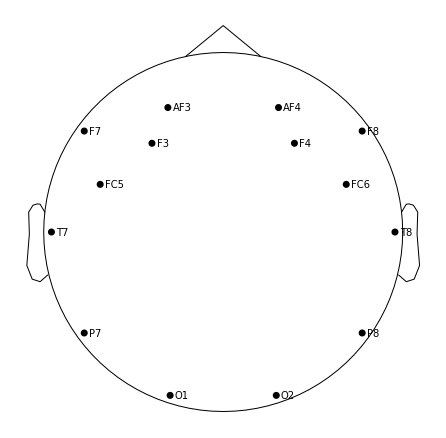

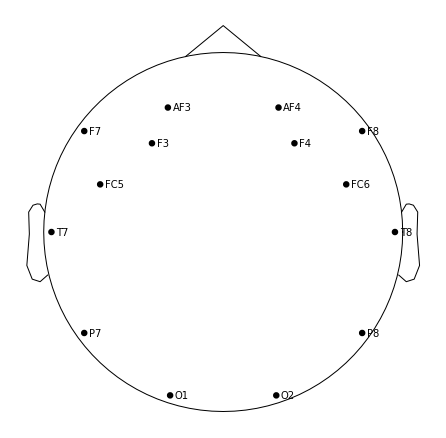

In [83]:

df = pd.read_csv('channels_positional_Emotiv14.txt')
ch_names = df.name.to_list()

pos = df[['x','y','z']].values/11 # Scale down to size
dig_ch_pos = dict(zip(ch_names,pos))
print(dig_ch_pos)
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos)
montage.plot()

In [84]:
stimuli

,Time:128Hz,Epoch,F3,FC5,AF3,F7,T7,P7,O1,O2,...,T8,F8,AF4,FC6,F4,Reference,Reference.1,Label,Mode of Stimulus,Stage
0,20.000000,0,6932.436035,8096.794922,4146.410156,2550.641113,3621.538574,1228.974365,3419.871826,5799.743652,...,2382.692383,6984.230957,2504.487061,5297.563965,7662.436035,2543.333252,940.384583,Lamp,audio,stimuli
1,20.007812,0,6715.641113,7600.769043,1234.615356,722.435913,5969.615234,5796.282227,7848.077148,6649.743652,...,1838.076904,7683.461426,6355.512695,8290.000000,5185.769043,5943.205078,681.025635,Lamp,audio,stimuli
2,20.015625,0,5448.846191,3505.641113,4227.563965,2491.923096,4615.000000,262.820496,7373.077148,1199.359009,...,2129.487061,4467.307617,5118.717773,602.435913,1653.974365,5593.589844,8382.307617,Lamp,audio,stimuli
3,20.023438,0,1480.384644,4577.563965,4324.102539,2265.897461,8336.025391,6121.538574,5785.000000,4247.563965,...,607.820496,2594.487061,4540.897461,4370.000000,2056.538574,5663.846191,7012.179688,Lamp,audio,stimuli
4,20.031250,0,2991.281982,4941.794922,6479.743652,2383.974365,1644.230713,6537.436035,4683.974121,8041.794922,...,4267.948730,3602.564209,3123.589844,462.051270,1499.871826,562.948730,7241.025879,Lamp,audio,stimuli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33275,4482.960938,129,6581.922852,6659.358887,3007.307617,4084.871826,2219.871826,5911.282227,4166.666504,5605.897461,...,8191.153809,7676.025879,4599.102539,1239.871826,3801.923096,1189.743530,1155.640991,Clock,text,stimuli
33276,4482.968750,129,2421.666748,6437.179688,4525.128418,6805.512695,421.282043,4466.666504,2554.615479,6562.436035,...,2271.923096,5885.769043,3495.512939,3018.589844,8328.974609,6279.102539,1344.102539,Clock,text,stimuli
33277,4482.976562,129,5712.307617,4172.307617,7901.410156,2333.589844,2333.205078,3178.718018,6028.205078,6933.333496,...,2052.820557,3807.435791,8277.692383,5705.128418,6986.153809,2425.384521,5032.307617,Clock,text,stimuli
33278,4482.984375,129,3771.794922,664.102539,4958.717773,7562.179688,784.102539,6047.179688,8190.512695,8028.333496,...,4864.743652,2004.359009,4039.615479,3894.743652,4952.948730,6607.563965,3267.051270,Clock,text,stimuli


In [85]:
stimuli_mne = stimuli.drop(columns = ['Time:128Hz', 'Epoch', 'Stage', 'Reference', 'Reference.1', 'Mode of Stimulus', 'Label'])

In [96]:
sfreq = 128
ch_names = list(stimuli_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_stimuli = mne.io.RawArray(stimuli[ch_names].transpose(), info)
raw_stimuli.set_montage(montage)
raw_stimuli.info
#raw_stimuli.plot()

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=33280
    Range : 0 ... 33279 =      0.000 ...   259.992 secs
Ready.


C:\Users\willa\AppData\Local\Temp\ipykernel_22180\638515599.py:6: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw_stimuli.set_montage(montage)


<Info | 8 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 14 items (14 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 128.0 Hz
>

Opening raw-browser...


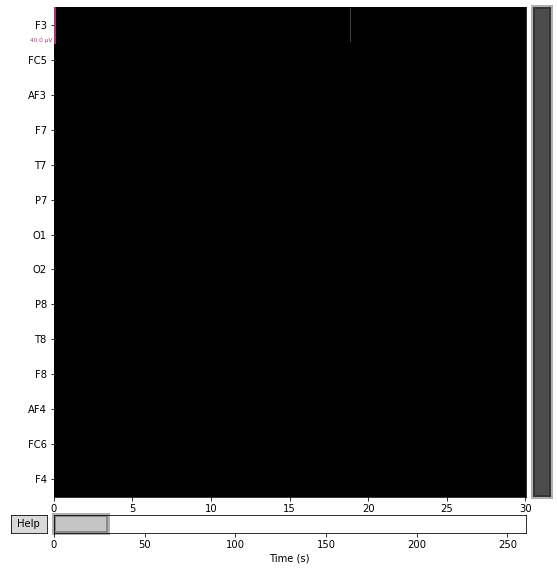

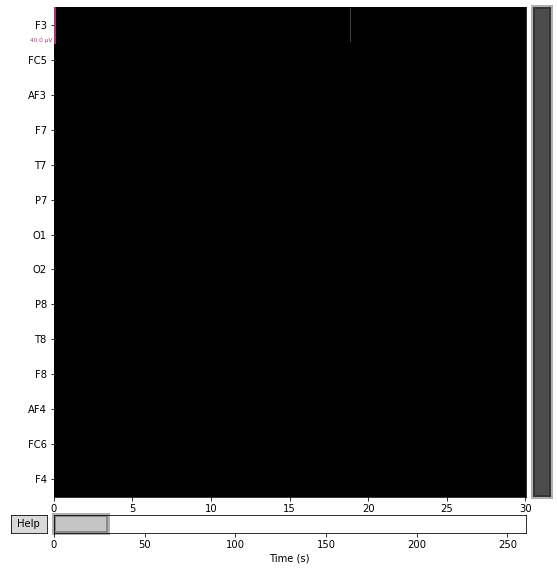

In [97]:
#raw.plot_psd(fmax=128)
raw_stimuli.plot(duration=30, n_channels=14)

In [98]:
ssp_projectors = raw_stimuli.info['projs']
print(ssp_projectors)
raw_stimuli.del_proj()

[]


<RawArray | 14 x 33280 (260.0 s), ~3.6 MB, data loaded>

Effective window size : 16.000 (s)


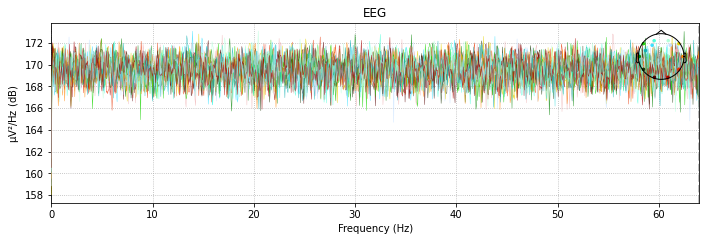

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 423 samples (3.305 sec)

Effective window size : 16.000 (s)


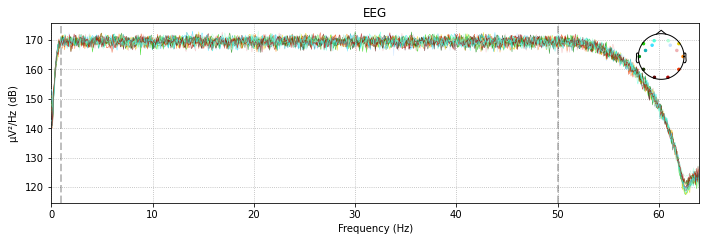

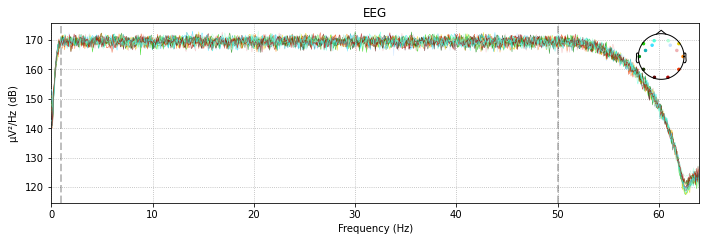

In [104]:
# High pass, Low pass filtering...

raw_stimuli.plot_psd(fmax=64)

low_cut = 1
hi_cut  = 50

raw_stimuli_filt = raw_stimuli.copy().filter(low_cut, hi_cut)
raw_stimuli_filt.plot_psd(fmax=64)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 14 components
Fitting ICA took 0.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
130 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


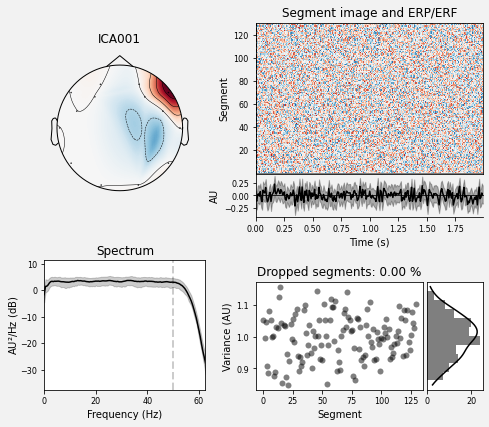

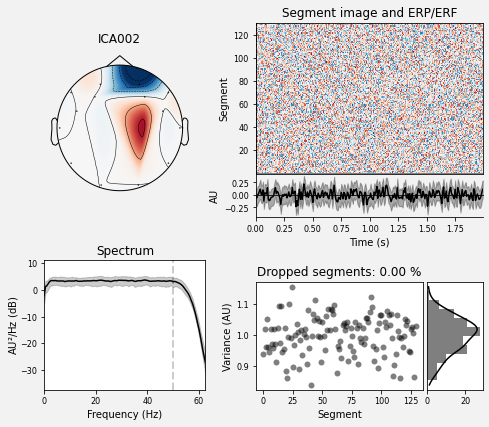

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [114]:
ica = mne.preprocessing.ICA(random_state=97, max_iter=800)
ica.fit(raw_stimuli_filt)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw_stimuli_filt, picks=ica.exclude)